## supervisor second sampling
* need random sample of the sample i have extracted, so the supervisors can check what i am doing
* got some quick look histograms! and pie charts

In [64]:
import numpy as np
import pandas as pd
import os
#from PIL import Image
from glob import glob
import csv
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math
import shutil

from numba import jit
import h5py
import random
from scipy.stats import iqr

In [65]:
'''
## code for if i want to do random sample
path_to_1000_sample = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_10000_sample/2ds_10000_new_2nd_fixed_dup.csv'
all_2ds_stats_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_stats/2ds/all_2ds_dup_updated.csv'

image_labelled_df = pd.read_csv(path_to_1000_sample)
full_ds_stats = pd.read_csv(all_2ds_stats_path)

# combine the samples + label with stats 
image_labelled_df = image_labelled_df.rename(columns={'image_name': 'name'}) # need to rename our column, so they merge nicely
images_labelled_lst = list(image_labelled_df['name'])
labelled_image_stats = full_ds_stats[full_ds_stats['name'].isin(images_labelled_lst)] # extract the ones labelled
merged_df = pd.merge(labelled_image_stats, image_labelled_df, on='name', how='left')  # merge them together

## save this 
save_merged = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_10000_sample/2ds_10000_new_2nd_fixed_dup_stats.csv'
merged_df.to_csv(save_merged, index=False)
'''

sample_with_info_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_10000_sample/2ds_10000_new_2nd_fixed_dup_stats.csv'
sample_with_info = pd.read_csv(sample_with_info_path)


In [66]:
## as i have ran the py scripts i have 3 sets of images with respective csvs + overlapping images
base_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/supervisor_label/' # contains 4 csvs (3 supervisor + 1 overlap)

if os.path.exists(base_path):
    # get string of full path + filenames in specif location
    file_list = glob(base_path+'*.csv')
    file_names = [os.path.basename(file_path) for file_path in file_list]

file_dic = {}
full_stats_dic = {}
for i in range(len(file_list)):
    # each csv for supervisor to read in
    label_df = pd.read_csv(file_list[i])
    file_dic[file_names[i][:-4]] = label_df
    name_list = list(label_df['image_name'])
    # extract the other associated info to images extracted (and also what i have labelled)
    full_stats_images = sample_with_info[sample_with_info['name'].isin(name_list)]
    full_stats_dic[file_names[i][:-4]] = full_stats_images

full_900_sample = pd.read_csv(base_path+'full_900_sample.csv')
name_900 = list(full_900_sample['image_name'])
full_900_stats = sample_with_info[sample_with_info['name'].isin(name_900)]

In [83]:
full_900_stats

,name,date,slice_s_idx,slice_e_idx,start_time,end_time,ellipse_d_max,Euclidean_d_max,Feret_d_max,area,...,image_trunc,aspect_ratio,wind_w,pres,alt,temp,LWC,IWC,number_label,note
3,19203_19ch0,220719,19203,19228,18:36:37.036000000,18:36:37.052000000,322.356992,341.760150,354.682957,52100.0,...,0,1.459482,-5.357894,364.98770,8345.3170,252.29915,0.539022,0.228249,1,NaN
4,19527_19ch0,220719,19527,19548,18:36:37.130000000,18:36:37.161000000,279.010697,322.024844,331.058907,37800.0,...,0,1.385861,-5.357894,364.98770,8345.3170,252.29915,1.022519,0.051016,2,NaN
8,43446_19ch0,220719,43446,43460,18:49:12.244000000,18:49:12.275000000,328.725638,333.766385,343.656806,31900.0,...,0,2.603933,0.012089,376.00420,8133.0860,253.59163,0.961791,0.313209,1,NaN
12,52030_19ch0,220719,52030,52043,18:49:14.256000000,18:49:14.256000000,298.047166,305.941171,320.156212,23200.0,...,0,2.439424,-3.278167,375.59850,8139.4470,253.41594,0.000000,0.020396,0,NaN
14,58865_19ch0,220719,58865,58886,18:49:24.865000000,18:49:24.865000000,327.411296,335.410197,353.553391,46300.0,...,0,1.725559,-5.150611,375.99597,8131.8130,254.47700,0.128300,0.132973,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,422336_08ch1,220808,422336,422358,18:15:52.765000000,18:15:52.765000000,339.223420,351.140997,360.555128,46400.0,...,0,1.739649,1.198045,467.96863,6418.2090,263.60306,0.009362,0.140120,1,NaN
9971,466675_08ch1,220808,466675,466700,18:15:54.871000000,18:15:54.871000000,280.367290,300.832179,310.161248,48500.0,...,0,1.154795,1.400191,468.04486,6419.7637,263.44230,0.057309,0.217819,1,NaN
9977,478047_08ch1,220808,478047,478073,18:15:56.368000000,18:15:56.368000000,483.097011,502.195181,511.957029,63500.0,...,0,2.559294,1.396190,468.10150,6419.2373,263.49230,0.010761,0.088772,1,NaN
9990,511302_08ch1,220808,511302,511330,18:16:08.411000000,18:16:08.411000000,355.380441,378.549865,388.329757,66100.0,...,0,1.342284,1.367180,469.80698,6388.4080,264.17398,0.002632,0.001554,1,NaN


### let me check my code is correct
yes it is !!!! i can relax <3

In [82]:
# i actually need to check my code does what i expect it to
name_list_900 = list(full_900_stats['name']) # this should be split up between 3 people
sup_0 = list(full_stats_dic['supervisor_0']['name'])
sup_1 = list(full_stats_dic['supervisor_1']['name'])
sup_2 = list(full_stats_dic['supervisor_2']['name'])
comb_sup = sup_0 + sup_1 + sup_2

unique_sup = pd.unique(comb_sup) # get rid of the overlap

## sort the values, they should be the same
name_list_900.sort()
unique_sup.sort()
## these lists should be equal, and they are!
if name_list_900 == list(unique_sup):
    print('yay!')

yay!


/tmp/ipykernel_546/4247442239.py:8: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_sup = pd.unique(comb_sup) # get rid of the overlap


In [54]:

key_list = list(file_dic.keys())
full_stats_dic['overlapping_images']
image_keys = ['supervisor_0', 'supervisor_1', 'supervisor_2']
column_names = list(full_stats_dic[image_keys[0]].columns)
subsample_df = pd.DataFrame(columns=column_names)

for name in image_keys:
    data = full_stats_dic[name]
    subsample_df = pd.concat([subsample_df, data], ignore_index=True)
    # this contains duplicates of the overlap

duplicates_mask = subsample_df.duplicated(subset=['name'])
pd.unique()
no_overlap_subsample = subsample_df[duplicates_mask]


/tmp/ipykernel_546/3170469476.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  subsample_df = pd.concat([subsample_df, data], ignore_index=True)


## getting from the original code to github

In [ ]:
## from in gws to local github + zip up images + name accordingly to my other code

## random sampling of images i have labelled
this is in py script now

In [23]:
usuable_images = image_labelled_df[image_labelled_df['note'] != 'a']
usuable_images_list = list(usuable_images['name'])

n_sample = 900

random.seed(42) # !! v important, means we choose same set images every time. 
r_sample_list = random.sample(usuable_images_list, k=n_sample)
#random_csv_dic[csv_column_names[0]] = r_sample_list
r_sample_list

['169042_01ch1',
 '1466478_20ch0',
 '1657181_23ch0',
 '2069727_19ch1',
 '1972228_25ch1',
 '109583_20ch0',
 '160632_08ch1',
 '356092_02ch1',
 '804794_25ch1',
 '324585_19ch1',
 '1186272_25ch1',
 '473733_07ch1',
 '697253_20ch0',
 '1957508_20ch0',
 '862682_19ch0',
 '360075_08ch0',
 '511694_19ch1',
 '1721680_19ch0',
 '634251_19ch1',
 '930746_19ch1',
 '290438_08ch1',
 '410594_23ch1',
 '2233018_19ch1',
 '512792_06ch0',
 '1845451_20ch1',
 '1699570_23ch0',
 '1561267_23ch0',
 '1714700_23ch1',
 '1144689_25ch1',
 '2010655_23ch1',
 '2587749_25ch1',
 '590678_23ch0',
 '1375246_25ch0',
 '1646979_25ch0',
 '2457785_20ch0',
 '29992_26ch1',
 '1530060_25ch1',
 '1168470_20ch1',
 '666727_07ch0',
 '649767_23ch1',
 '926152_20ch1',
 '425374_01ch1',
 '2529481_25ch1',
 '1099897_20ch0',
 '1890557_20ch1',
 '1244231_19ch1',
 '100313_20ch0',
 '318528_02ch0',
 '1140025_19ch1',
 '1698640_25ch0',
 '319896_02ch0',
 '2108674_19ch1',
 '1135747_19ch1',
 '2391918_25ch0',
 '1039950_25ch0',
 '1752788_23ch0',
 '1218448_25ch1',


In [24]:
## inital total sample 900, then remove 10%
## need to know the % overlap - then deduct from the sample

n_people = 3
overlap_per = 10 

n_sample = int(len(r_sample_list) / n_people)
segments = list(range(0,len(r_sample_list)+1,n_sample)) # segment up data
per_subsample = int(segments[1]/overlap_per)
dic_of_sample = {}

for i in range(n_people):
    segment_of_sample = r_sample_list[segments[i]:segments[i+1]] # this is one sample of data
    overlap_sample = random.sample(segment_of_sample, per_subsample) # represents a subsample of data that will be used to overlap checking
    dic_of_sample[str(i)] = [segment_of_sample,overlap_sample]

## e.g. dic_of_sample['0'][0] = 300 sample images that the person needs to label
##      dic_of_sample['0'][1] = random 10% of the 300 that other people need to label

In [25]:
## now getting complex, need to split the second ovelap between the ones not extracted from
n_people_int = list(range(0,n_people))
overlap_value = len(dic_of_sample['0'][1])
n_split = n_people -1 ## how many the subsample needs to be split between
n_sample_overlap = int(overlap_value/n_split)
overlap_segs = list(range(0, overlap_value+1, n_sample_overlap)) # segment up overlap data
n_people_list = [str(value) for value in n_people_int]

dic_of_overlap = {key: [] for key in n_people_list } ## corresponds to first one, i.e. [0] sample is [0] seperate overlap sample
# so dic_of_overlap[0] = images that overlap with 1 / 2

for i in range(n_people):
    # remove the current value
    append_list = [item for item in n_people_int if item != i]
    subsample_data = dic_of_sample[str(i)][1]
    #print(len(subsample_data))
    for j in range(n_split):
        #print(append_list[j])
        #print(f'{overlap_segs[j]} to {overlap_segs[j+1]}')
        #print(len(subsample_data[overlap_segs[j]:overlap_segs[j+1]]))
        dic_of_overlap[str(append_list[j])].append(subsample_data[overlap_segs[j]:overlap_segs[j+1]])
        # so each value has 2 lists - that needs to be combined

## e.g. 3 people label - so each person has subsample of 30 to split between other two
##      dic_of_overlap['0'][0] = 15 random images from dic_of_sample['1'][1]
##      dic_of_overlap['0'][1] = 15 random images from dic_of_sample['2'][1]
## both these lists joined together -> the overlap to also sample

## want to make a csv of the overlapping images
## then seperate csvs for each set of images each person has to label
## then put each respective image in the folder

In [27]:
## final labelling csv
overlapping_images = []
final_lists = {}

for i in range(n_people):
    original_big_sample = dic_of_sample[str(i)][0]

    for j in range(n_split):
        overlap_images = dic_of_overlap[str(i)][j]
        original_big_sample.extend(overlap_images)
        overlapping_images.extend(overlap_images) # want big list of all the overlapping images
    
    final_lists[str(i)] = original_big_sample

## final_lists contains 3 keys for each supervisor, with their final respective list for labelling
## then overlapping_images contains the list of images that overlap

In [40]:
image_loc = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_10000_sample/'
base_path_to_save = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/supervisor_label/' # sub-folders within this with all the images

def save_csv(image_list, save_full_path):
    csv_column_names = ['image_name','number_label']
    csv_dic = dict.fromkeys(csv_column_names)
    csv_dic['image_name'] = image_list
    csv_df = pd.DataFrame.from_dict(csv_dic)
    random_csv_df.to_csv(save_full_path, index=False)

def make_folder_move_image(set_of_images, start_loc, end_loc):
    # make sub-folder etc
    if not os.path.exists(end_loc):
        os.makedirs(end_loc)
        print(f'created {end_loc}')    
    
    ## loop though and move each image
    for image in set_of_images:
        current_image_loc = f'{image_loc}{image}.png'
        
        if os.path.exists(current_image_loc) and os.path.exists(end_loc):
            shutil.copy(current_image_loc, end_loc)
    

## loop through main supervisor script - their specific set of images ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for supervisor_number in final_lists:
    ## csv name matches to the folder corresponding to images
    corresponding_name = f'supervisor_{supervisor_number}'
    csv_save_path = f'{base_path_to_save}{corresponding_name}.csv'
    set_of_images = final_lists[supervisor_number]
    image_save_path = f'{base_path_to_save}{corresponding_name}/'
    ## csv saving
    save_csv(set_of_images, image_save_path)
    ## function which does what it says
    make_folder_move_image(set_of_images, image_loc, image_save_path)
    print(f'moved {supervisor_number} images!')


## do the overlapping images seperately ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
overlap_csv_save_path = f'{base_path_to_save}overlapping_images.csv'
overlap_image_save_path = f'{base_path_to_save}overlapping_images/'
## csv saving
save_csv(overlapping_images, overlap_csv_save_path)

make_folder_move_image(overlapping_images, image_loc, overlap_image_save_path)
print(f'moved overlapping images!')






In [41]:
image_save_path

'/gws/nopw/j04/dcmex/users/ezriab/image_labelling/supervisor_label/supervisor_2/'

In [20]:
len(final_lists['0'])

330

In [10]:
dic_of_sample['0'][0]

['169042_01ch1',
 '1466478_20ch0',
 '1657181_23ch0',
 '2069727_19ch1',
 '1972228_25ch1',
 '109583_20ch0',
 '160632_08ch1',
 '356092_02ch1',
 '804794_25ch1',
 '324585_19ch1',
 '1186272_25ch1',
 '473733_07ch1',
 '697253_20ch0',
 '1957508_20ch0',
 '862682_19ch0',
 '360075_08ch0',
 '511694_19ch1',
 '1721680_19ch0',
 '634251_19ch1',
 '930746_19ch1',
 '290438_08ch1',
 '410594_23ch1',
 '2233018_19ch1',
 '512792_06ch0',
 '1845451_20ch1',
 '1699570_23ch0',
 '1561267_23ch0',
 '1714700_23ch1',
 '1144689_25ch1',
 '2010655_23ch1',
 '2587749_25ch1',
 '590678_23ch0',
 '1375246_25ch0',
 '1646979_25ch0',
 '2457785_20ch0',
 '29992_26ch1',
 '1530060_25ch1',
 '1168470_20ch1',
 '666727_07ch0',
 '649767_23ch1',
 '926152_20ch1',
 '425374_01ch1',
 '2529481_25ch1',
 '1099897_20ch0',
 '1890557_20ch1',
 '1244231_19ch1',
 '100313_20ch0',
 '318528_02ch0',
 '1140025_19ch1',
 '1698640_25ch0',
 '319896_02ch0',
 '2108674_19ch1',
 '1135747_19ch1',
 '2391918_25ch0',
 '1039950_25ch0',
 '1752788_23ch0',
 '1218448_25ch1',


In [26]:
#len(list(dic_of_sample['0']))
overlap_per = 10 
number_shared = int(900/overlap_per)
number_shared

overlap_per = random.sample(r_sample_list, number_shared)
len(overlap_per)

non_overlap = [item for item in r_sample_list if item not in list2] # get out images that wont overlap

90

## plots xoxo

In [36]:
def quick_hist_bx(df, variable, units = None, opt_title= None, n_bins = 50):
    fig, axs = plt.subplots(2,1,gridspec_kw={"height_ratios": (0.90, 0.1)}, figsize=(16, 6), tight_layout=True)
    data = df[variable]
    ax_hist = axs[0] # The histogram axis
    ax_box = axs[1]   # The boxplot axis
    
    # Plot histogram
    ax_hist.hist(data, bins=n_bins, edgecolor='black')
    ax_hist.set_ylabel('count')
    
    if units:
        ax_hist.set_xlabel(units)
    
    if opt_title:
        ax_hist.set_title(f'2ds {opt_title} {variable}')

    else:
        ax_hist.set_title(f'2ds {variable}')
    
    # Plot boxplot
    ax_box.axis('off') 
    outlier = dict(marker = 'x')
    ax_box.boxplot(data, vert=False,  flierprops = outlier, widths = 0.6, notch=True, patch_artist=True)  # Horizontal boxplot
        
    plt.show()

def quick_pie(df):
    labels = [0,1,2,3,4,6,7,8,9]
    category_dic = {'1':['CP'],'2':['FA'],'3':['Co'],'4':['HPC'],'6':['CBC'],'7':['CA'],'8':['CC'],'9':['WD'],'0':['DIF']}
    for label in labels:
        number_samples = df[df['number_label'] == label]
        samplecount= number_samples['name'].count()
        category_dic[str(label)].append(samplecount)
    
    name_list = [value[0] for value in category_dic.values()]
    count_list = [value[1] for value in category_dic.values()]
    
    fig, ax = plt.subplots()
    ax.pie(count_list, labels= name_list)

## assuming to use name_list_of_sample + merged_df
def rand_sample_df(n_sample):
    random.seed(42) # !! v important, means we choose same set images every time. 
    sample_list = random.sample(name_list_of_sample, k=n_sample)
    sampled_df = merged_df[merged_df['name'].isin(sample_list)] # extract the ones labelled
    return sampled_df

In [15]:
merged_df_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_10000_sample/2ds_10000_new_2nd_fixed_dup_stats.csv'
merged_df = pd.read_csv(merged_df_path)
name_list_of_sample = list(merged_df['name'])

### variable number of random sample

In [24]:
## do random sample
merged_df_1000_sample = rand_sample_df(1000)
merged_df_500_sample = rand_sample_df(500)
merged_df_250_sample = rand_sample_df(250)

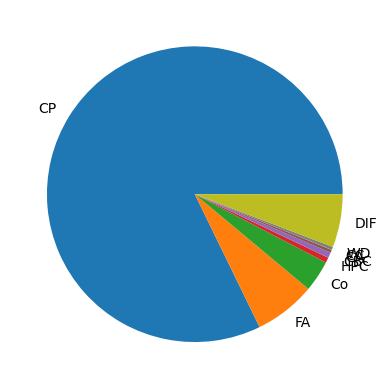

In [42]:
variable = 'Euclidean_d_max'
#quick_hist_bx(merged_df,variable, opt_title= 'full 10000 sample')#, plt_units)
quick_pie(merged_df)

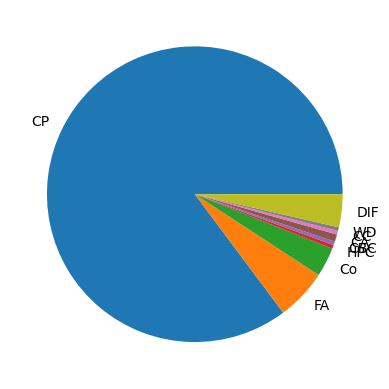

In [43]:
#quick_hist_bx(merged_df_250_sample,variable, opt_title= '250 sample')#, plt_units)
quick_pie(merged_df_250_sample)

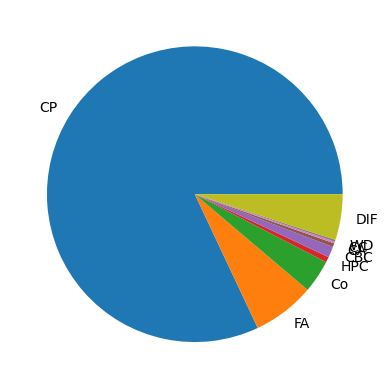

In [45]:
#quick_hist_bx(merged_df_500_sample,variable, opt_title= '500 sample')#, plt_units)
quick_pie(merged_df_500_sample)

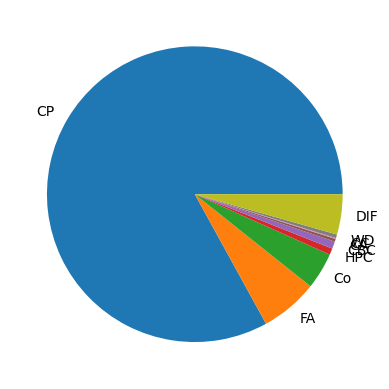

In [46]:
#quick_hist_bx(merged_df_1000_sample,variable, opt_title= '1000 sample')#, plt_units)
quick_pie(merged_df_1000_sample)

In [37]:
#merged_df


([<matplotlib.patches.Wedge at 0x7fa09c9c0a50>,
 [Text(-0.9327796767121046, 0.5830283652729613, 'CP'),
  Text(0.6784797994035788, -0.8658320632786012, 'FA'),
  Text(0.9153480267757444, -0.6100311384493019, 'Co'),
  Text(0.9844394222142724, -0.4907942786855097, 'HPC'),
  Text(1.001954719699567, -0.4539677738251495, 'CBC'),
  Text(1.0145230004032684, -0.42513889689459144, 'CA'),
  Text(1.0188763549647215, -0.41459736286402377, 'CC'),
  Text(1.0233738511047765, -0.4033682695440714, 'WD'),
  Text(1.0817234318752895, -0.19968579551872526, 'DIF')])

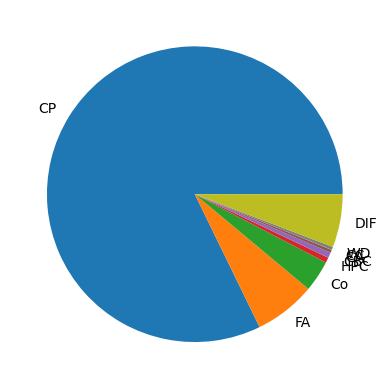

In [35]:
#name_list = [value[0] for key in category_dic[key]]


In [36]:
name_list

['CP', 'FA', 'Co', 'HPC', 'CBC', 'CA', 'CC', 'WD', 'DIF']

### original + 900 random sample

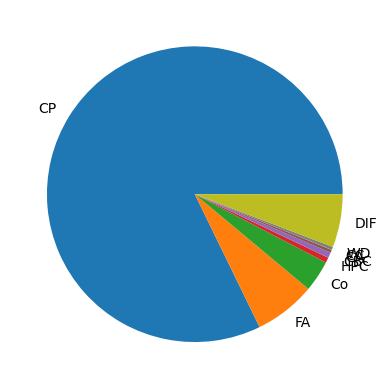

In [37]:
quick_pie(sample_with_info) ## this is the full 10000

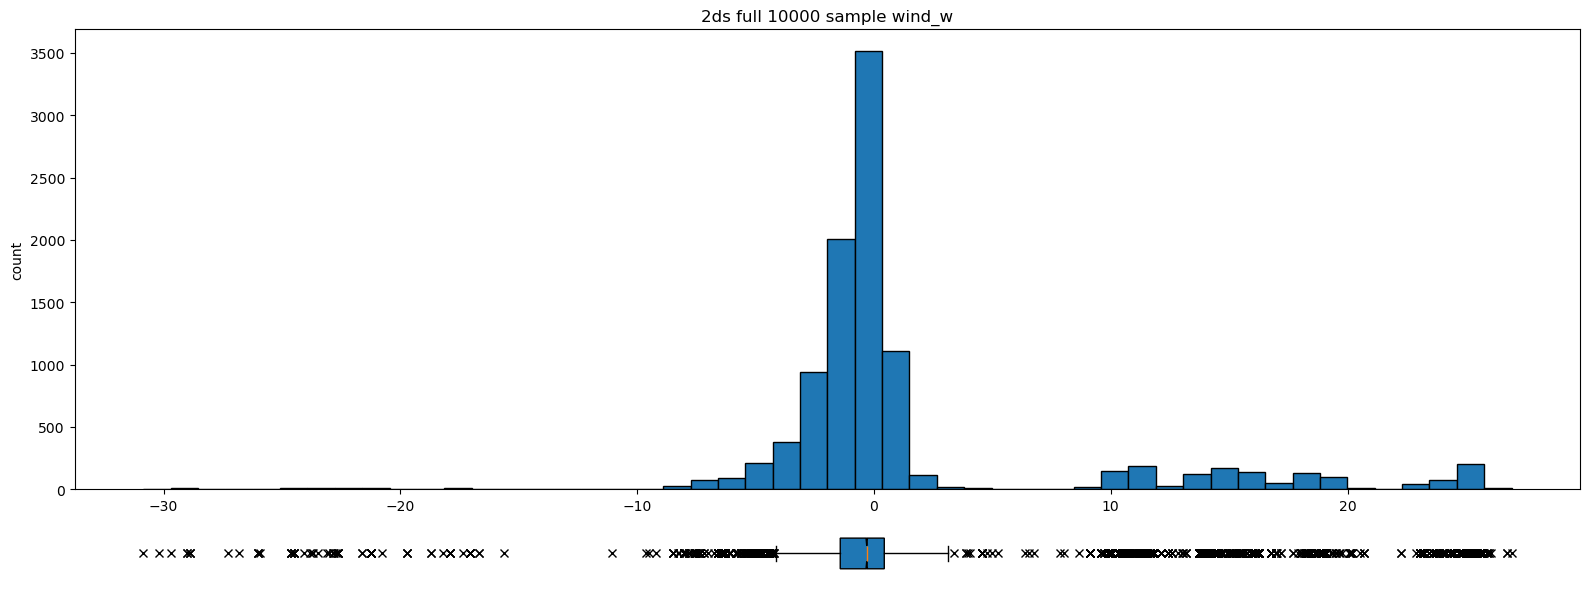

In [86]:
variable = 'wind_w'
quick_hist_bx(sample_with_info, variable, opt_title= 'full 10000 sample')#, plt_units)


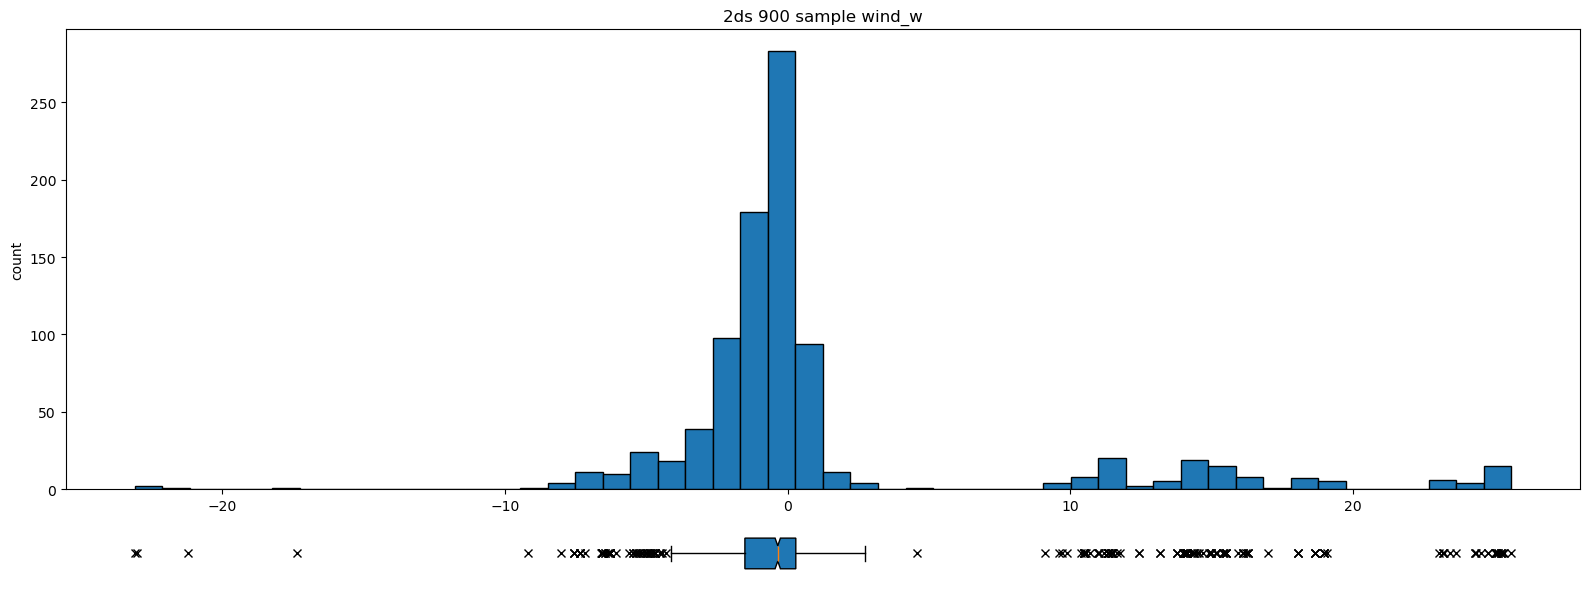

In [87]:
quick_hist_bx(full_900_stats, variable, opt_title= '900 sample')#, plt_units)

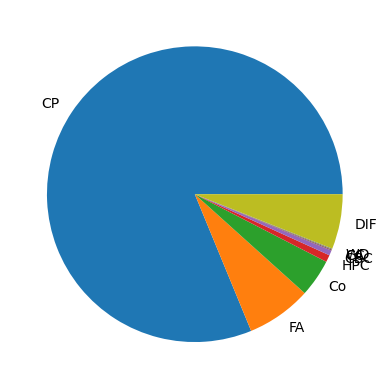

In [62]:
quick_pie(full_900_stats)